<a href="https://colab.research.google.com/github/soobook/PyTorch-DL/blob/main/code/PT03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3회차: DNN을 활용한 심장병 판별 (1) – 이론 및 데이터 분석

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [2]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 데이터시각화

In [13]:
# 데이터 시각화 그림 선명하도록 설정
%config InlineBackend.figure_format = 'retina'

# Colab에서 한글 설정
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 68.8 MB/s eta 0:00:00


In [25]:
# 그림을 그릴 때마다 설정 변경
# plt.figure(figsize=(5,3))
# 한번 설정하면 그림 크기 설정이 계속 반영
plt.rcParams.update({'figure.figsize': (4, 3)})

### 성별에 따른 심장병 발생 확률

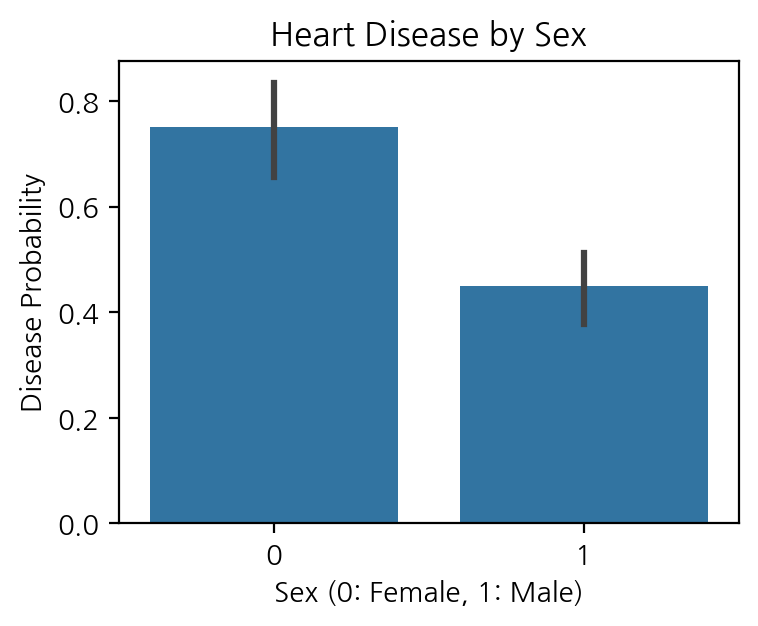

In [27]:
# 데이터 시각화 패키지 메모리 로드
import seaborn as sns
import matplotlib.pyplot as plt

# barplot은 단순히 데이터 개수를 세는 게 아니라 평균값(mean)을 계산해 시각화하고,
# 기본적으로 신뢰구간(confidence interval, 보통 95%)을 에러바(error bar)로 함께 그림
sns.barplot(x='sex', y='target', data=df)
plt.title("Heart Disease by Sex")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Disease Probability")
plt.show()

In [16]:
# 성별(sex) 기준으로 그룹화하여 target의 평균 계산
df.groupby(['sex']).agg(mean = ("target", "mean"))

,mean
sex,
0,0.750000
1,0.449275


#### 가슴통증(cp)에 종류에 따른 사람 수
| 값(cp) | 의미               | 설명                             |
| ----- | ---------------- | ------------------------------ |
| 0     | Typical angina   | 운동 시 발생하고 휴식 시 완화되는 전형적 협심증    |
| 1     | Atypical angina  | 비전형적 협심증: 운동과 무관하거나 예측 불가능한 경우 |
| 2     | Non-anginal pain | 협심증과 관련 없는 흉통                  |
| 3     | Asymptomatic     | 증상이 없는 경우 (무증상)                |



In [17]:
df.cp.value_counts()

,count
cp,
0,143
2,87
1,50
3,23


In [18]:
df.cp.value_counts().sort_index()

,count
cp,
0,143
1,50
2,87
3,23


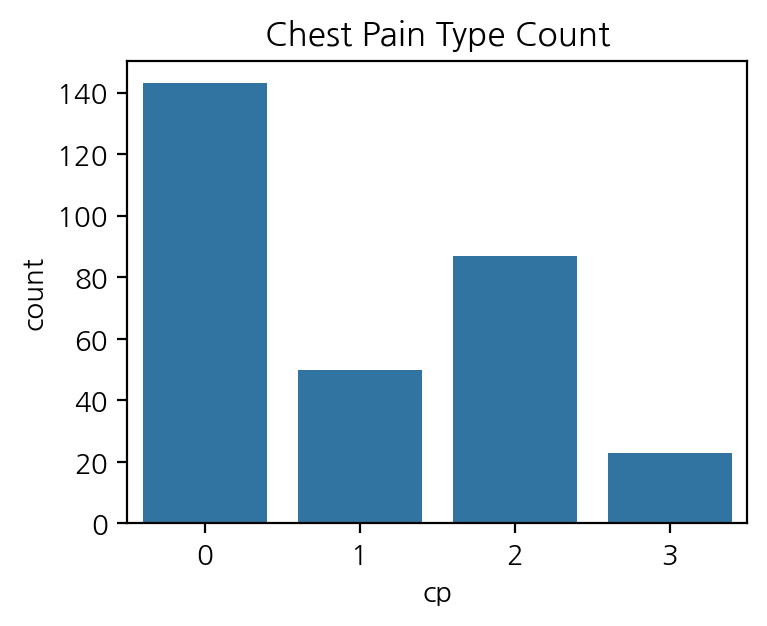

In [19]:
sns.countplot(x='cp', data=df)
plt.title("Chest Pain Type Count")
plt.show()

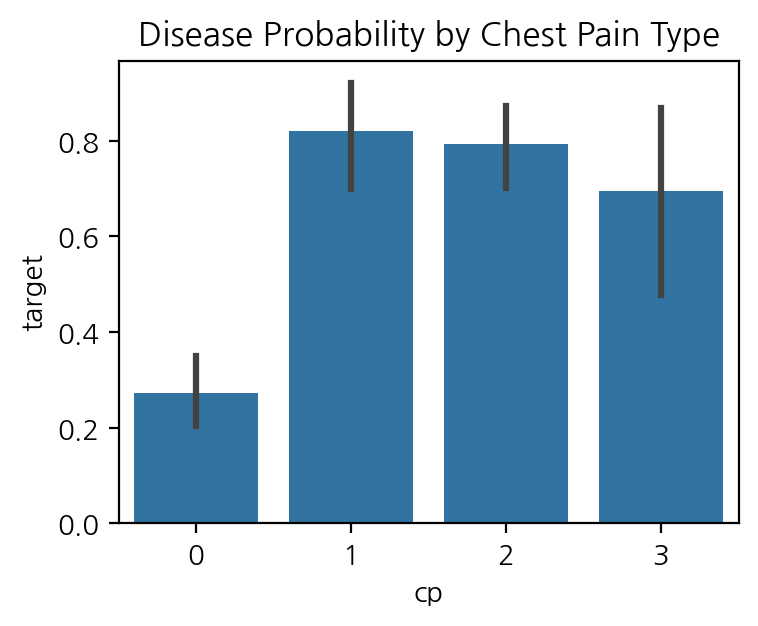

In [20]:
sns.barplot(x='cp', y='target', data=df)
plt.title("Disease Probability by Chest Pain Type")
plt.show()

In [21]:
df.groupby(['cp']).agg(mean = ("target", "mean"))

,mean
cp,
0,0.272727
1,0.820000
2,0.793103
3,0.695652


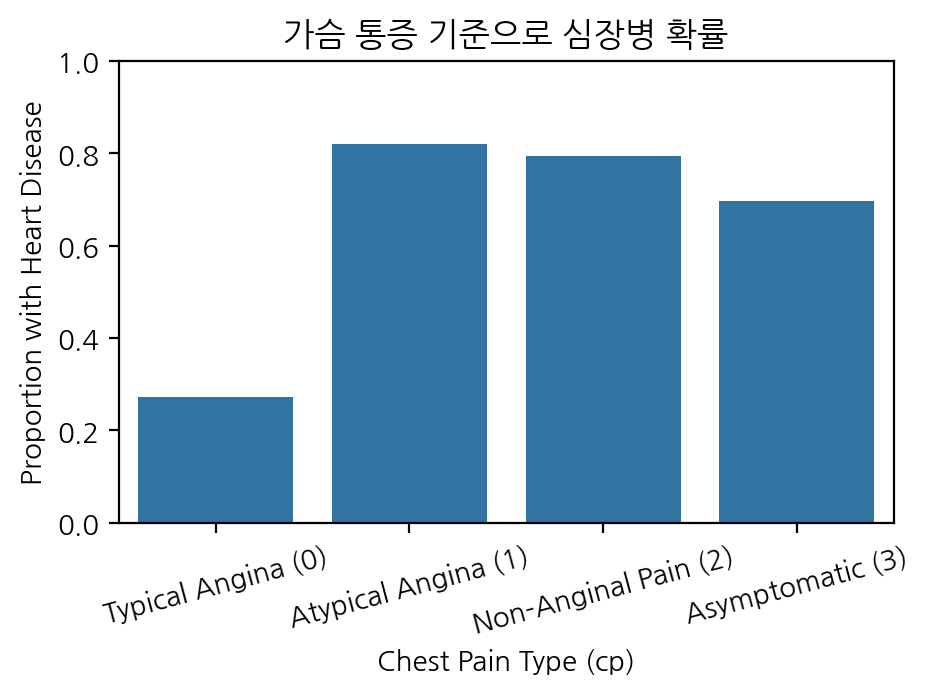

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

# 그림을 그릴 때마다 설정 변경
plt.figure(figsize=(5,3))

# 시각화
sns.barplot(data=df, x='cp', y='target', errorbar=None);
plt.title("가슴 통증 기준으로 심장병 확률")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Proportion with Heart Disease")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Typical Angina (0)",
                                       "Atypical Angina (1)",
                                       "Non-Anginal Pain (2)",
                                       "Asymptomatic (3)"], rotation=15)
plt.ylim(0, 1)
plt.show()

### 수업 종료

## 심화 학습

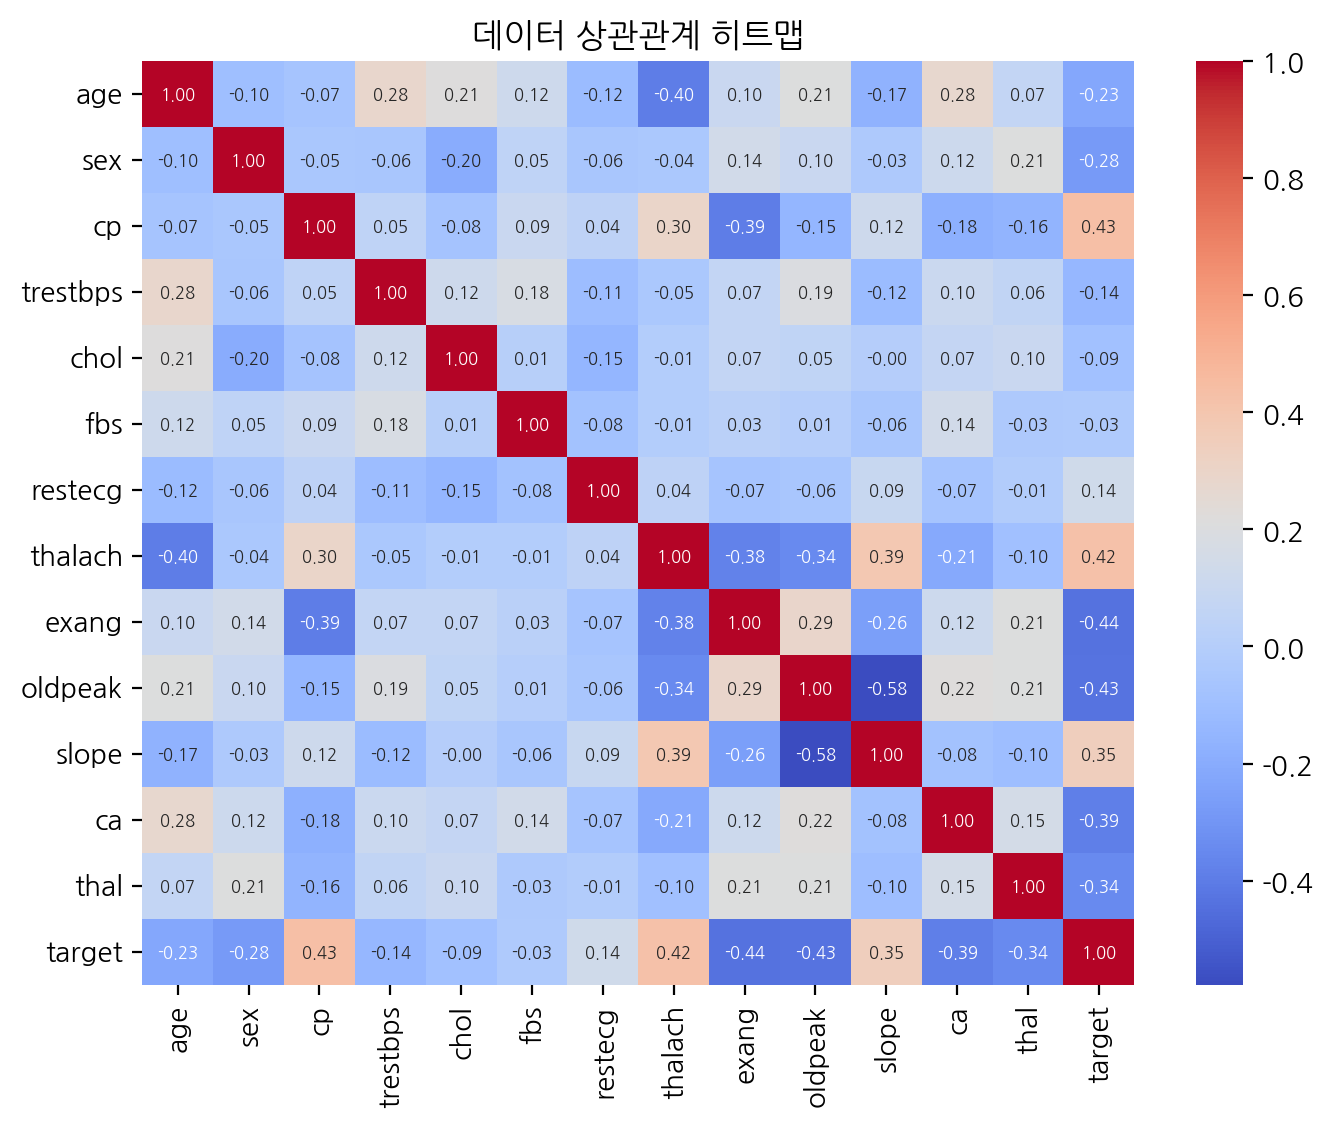

In [ ]:
# 그림 크기 지정
plt.figure(figsize=(8,6));

sns.heatmap(df.corr(), annot=True, annot_kws={"size": 6}, fmt=".2f", cmap='coolwarm')
plt.title("데이터 상관관계 히트맵")
plt.show()

## End of code